## Corelation:
* It is used to find the differnce betwwn the variables
* It is used to find the strength between the input and output variables

## differnce between corelation and regerssion
  **correlation specifies the stenght of input and output variables x on y == y on x,, in regression x on y != y on x
->corelation find s a numerial value,in regression we need to fit a striaght line
##  
## ->in regerssion we need to predibct the values ,corealtion is used to find the realtn btwn input and output
## ->corelation vlaue lies between -1 to +1 if the value is 0 then it indicates there is no linaer relation
# 0.5+-->good possitive corelation
# 0 -0.5-->good negative corelation
## 0.85-0.65-->moderate corelation
## -->  >0.85 good corelation

## p-values should be less than ).05 if want to get r-squared value to be 0.95

## Assumptions of mlr:
 
## linerity about the parametrsn-->
* b0,b1,..bn should be linear 

## Errors should be independent-->
 * we should not the prdict the upcoming errors
 
## normally about the errors _:
* when we plot the erors it shoud be a straight line
## Inpu variables shoyld be equally reliable

## short form{LINE}-[linesraity-input variables-normality-Errors]

# Homoscedasticity[homo-ski-das-ti-ity]
* it deals with the th errors lying on a particular range,error is same Across all the independent variables

# Hetroscedasticity:
* there will be huge diiferance betwn the errors generated by the independent variables
* opposite to homo

## Multi-collinearity
* If the input variables are linearly independent of each other then it si called as multi-collinearity problem
* example:qiz competeion

## we considered adj-R Squred value

Multiple linear regression (MLR) is used to determine a mathematical relationship among a number of random variables. In other terms, MLR examines how multiple independent variables are related to one dependent variable. Once each of the independent factors has been determined to predict the dependent variable, the information on the multiple variables can be used to create an accurate prediction on the level of effect they have on the outcome variable. The model creates a relationship in the form of a straight line (linear) that best approximates all the individual data points.

In [1]:
#packages to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to display the plot in the same page we use the inline keyword
%matplotlib inline

In [3]:
data7=pd.read_excel(r"C:\Users\Lap3\Desktop\maheshCMR\Basket.xlsx")
data7.head(10)

,Height,Weight,Goals,Freethrows,Avg
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2
5,6.4,225,0.431,0.780,27.4
6,6.3,185,0.487,0.771,9.3
7,6.8,235,0.469,0.750,16.0
8,6.9,235,0.435,0.818,4.7
9,6.7,210,0.480,0.825,12.5


In [4]:
data7.shape  #dimension of a table

(54, 5)

In [5]:
data7.columns #to display the number of columns

Index(['Height', 'Weight', 'Goals', 'Freethrows', 'Avg'], dtype='object')

In [6]:
data7.corr()  #to corelate the given data

,Height,Weight,Goals,Freethrows,Avg
Height,1.000000,0.834324,0.495546,-0.259271,-0.068906
Weight,0.834324,1.000000,0.516051,-0.290159,-0.009844
Goals,0.495546,0.516051,1.000000,-0.018570,0.338760
Freethrows,-0.259271,-0.290159,-0.018570,1.000000,0.244852
Avg,-0.068906,-0.009844,0.338760,0.244852,1.000000


In [7]:
type(data7)

pandas.core.frame.DataFrame

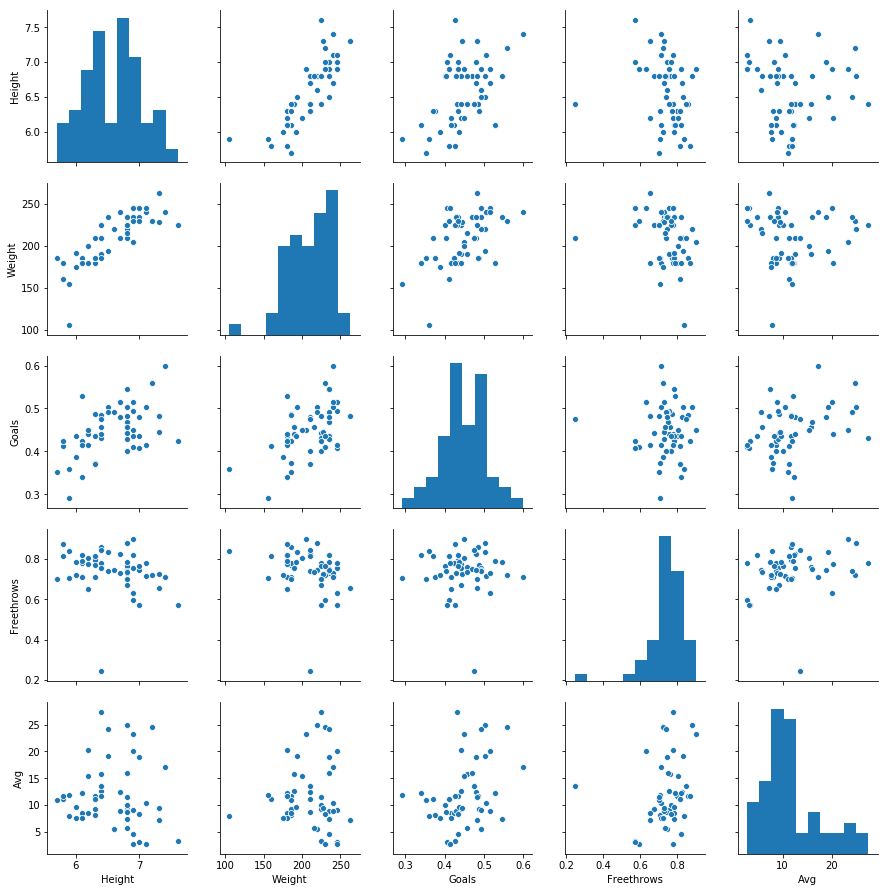

In [8]:
import seaborn as sns
sns.pairplot(data7.iloc[:,:])  #plotting of data on eachother

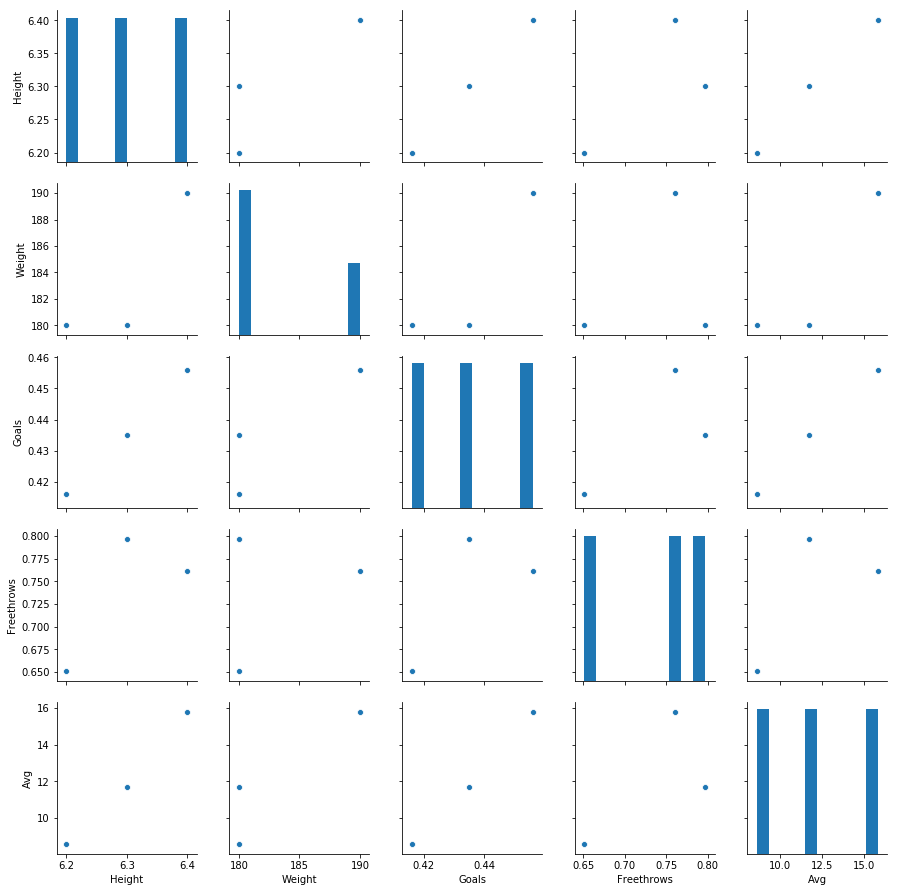

In [9]:
sns.pairplot(data7.iloc[1:4])  ##cosiders first 3 records/tuples in data

In [12]:
## spaces are not allowed in the declaration of variable names in Excel sheet or any..

In [11]:
# for building the linear regression model
import statsmodels.formula.api as mif

#ols is a function, fit is a function used to fit the reg  model on the dataset. 
#ols is a method which is being implemented on the dataset
mlr1=mif.ols("Avg ~ Weight+ Goals+ Freethrows+ Height", data=data7).fit()

# to view the coefficient
mlr1.params

Intercept      4.148707
Weight         0.009458
Goals         47.940199
Freethrows    11.371019
Height        -3.690499
dtype: float64

In [14]:
mlr1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Avg   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     3.501
Date:                Thu, 08 Aug 2019   Prob (F-statistic):             0.0136
Time:                        15:20:55   Log-Likelihood:                -165.17
No. Observations:                  54   AIC:                             340.3
Df Residuals:                      49   BIC:                             350.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1487     14.855      0.279      0.781     -25.704      34.001
Weight         0.0095      0.046      0.204      0.839      -0.084       0.102
Goals         47.9402     15.709      3.052      0.004      16.372      79.509
Freethrows    11.3710      7.869      1.445      0.155      -4.441      27.183
Height        -3.6905      2.971     -1.242      0.220      -9.661       2.280
==============================================================================
Omnibus:                        7.089   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.471
Skew:                           0.835   Prob(JB):                       0.0393
Kurtosis:                       3.296   Cond. No.                     4.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
## tomake the R-squared value 0.95 consider the value of p which are greater then 0.05 in debcreasing order
m1_v= mif.ols("Avg ~ Weight", data = data7).fit()
m1_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Avg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                  0.005039
Date:                Thu, 08 Aug 2019   Prob (F-statistic):              0.944
Time:                        15:25:56   Log-Likelihood:                -171.96
No. Observations:                  54   AIC:                             347.9
Df Residuals:                      52   BIC:                             351.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1935      5.731      2.128      0.038       0.693      23.694
Weight        -0.0019      0.027     -0.071      0.944      -0.056       0.052
==============================================================================
Omnibus:                        7.888   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.461
Skew:                           0.900   Prob(JB):                       0.0240
Kurtosis:                       3.278   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
m2_v= mif.ols("Avg ~ Height", data = data7).fit()
m2_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Avg   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.2481
Date:                Thu, 08 Aug 2019   Prob (F-statistic):              0.621
Time:                        15:27:30   Log-Likelihood:                -171.83
No. Observations:                  54   AIC:                             347.7
Df Residuals:                      52   BIC:                             351.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.6256     11.743      1.501      0.139      -5.938      41.189
Height        -0.8858      1.778     -0.498      0.621      -4.455       2.683
==============================================================================
Omnibus:                        8.995   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.803
Skew:                           0.977   Prob(JB):                       0.0123
Kurtosis:                       3.313   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
m3_v= mif.ols("Avg ~ Freethrows", data = data7).fit()
m3_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Avg   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.316
Date:                Thu, 08 Aug 2019   Prob (F-statistic):             0.0743
Time:                        15:28:08   Log-Likelihood:                -170.29
No. Observations:                  54   AIC:                             344.6
Df Residuals:                      52   BIC:                             348.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0907      5.928      0.184      0.855     -10.805      12.986
Freethrows    14.4234      7.920      1.821      0.074      -1.470      30.316
==============================================================================
Omnibus:                        8.396   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.311
Skew:                           0.958   Prob(JB):                       0.0157
Kurtosis:                       3.160   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##In above three the p-value is >0.05 so influence the plot to know which records are giving larger values

In [19]:
#print("modelname".conf_int(0.05))# setting the accuracy value


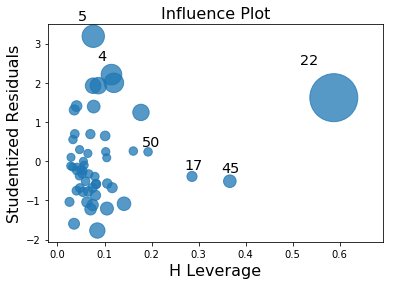

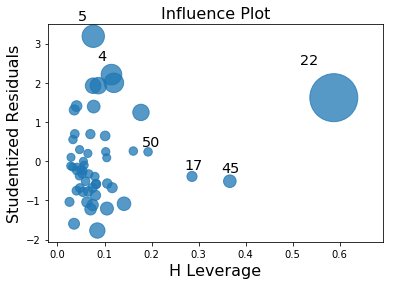

In [20]:
import statsmodels.api as sm
sm.graphics.influence_plot(mlr1)

In [21]:
# to remove the influential records we need to use the 
# drop function along with the index of the variable which we want to remove
data77=data7.drop(data7.index[[22,5]],axis = 0,inplace = False)

In [22]:
data77.head(30)

,Height,Weight,Goals,Freethrows,Avg
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2
6,6.3,185,0.487,0.771,9.3
7,6.8,235,0.469,0.750,16.0
8,6.9,235,0.435,0.818,4.7
9,6.7,210,0.480,0.825,12.5
10,6.9,245,0.516,0.632,20.1


In [24]:
mlr1=mif.ols("Avg ~ Weight+ Goals+ Freethrows+ Height", data=data77).fit()
mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Avg   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     4.937
Date:                Thu, 08 Aug 2019   Prob (F-statistic):            0.00209
Time:                        16:04:55   Log-Likelihood:                -153.62
No. Observations:                  52   AIC:                             317.2
Df Residuals:                      47   BIC:                             327.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.9247     16.342     -0.974      0.335     -48.800      16.950
Weight        -0.0153      0.043     -0.353      0.725      -0.102       0.072
Goals         43.9984     14.977      2.938      0.005      13.868      74.129
Freethrows    22.8648     10.892      2.099      0.041       0.953      44.776
Height        -0.9611      2.803     -0.343      0.733      -6.600       4.678
==============================================================================
Omnibus:                        3.892   Durbin-Watson:                   2.414
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.576
Skew:                           0.638   Prob(JB):                        0.167
Kurtosis:                       2.858   Cond. No.                     5.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
rsq_wt = mif.ols("Weight ~ Goals+ Freethrows+ Height", data = data7).fit().rsquared
vif_wt = 1/(1-rsq_wt)
vif_wt

3.5542995265600306

In [27]:
rsq_g = mif.ols("Goals ~ Height+ Freethrows+ Height", data = data7).fit().rsquared
vif_g = 1/(1-rsq_g)
vif_g

1.3486478123553876

In [28]:
rsq_ft = mif.ols("Freethrows ~ Weight+ Goals+ Height", data = data7).fit().rsquared
vif_ft = 1/(1-rsq_ft)
vif_ft

1.124131050218063

In [29]:
rsq_ht = mif.ols(" Height ~ Weight+ Goals+ Freethrows", data = data7).fit().rsquared
vif_ht = 1/(1-rsq_ht)
vif_ht

3.3645504551368375

In [30]:
d1 = {'var':['Weight','Goals','Freethrows','Height'], 'vif':[vif_wt,vif_g,vif_ft,vif_ht]}
print(type(d1))
vif_frame = pd.DataFrame(d1)
vif_frame

<class 'dict'>


,var,vif
0,Weight,3.554300
1,Goals,1.348648
2,Freethrows,1.124131
3,Height,3.364550


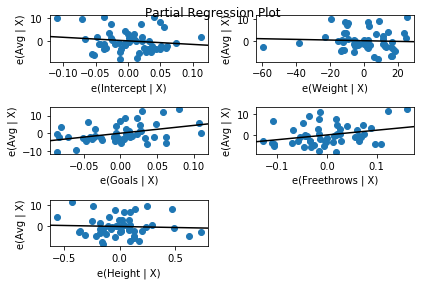

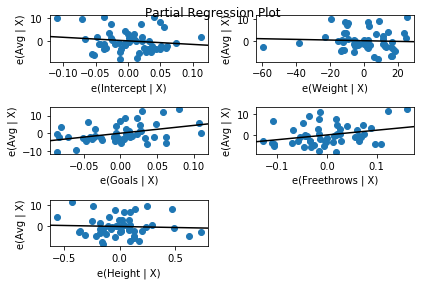

In [31]:
sm.graphics.plot_partregress_grid(mlr1)#optional if vif done..

In [33]:
final_m1 = mif.ols('Avg ~ Goals+Freethrows+Height', data=data7).fit()
final_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Avg   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     4.744
Date:                Thu, 08 Aug 2019   Prob (F-statistic):            0.00547
Time:                        16:43:18   Log-Likelihood:                -165.20
No. Observations:                  54   AIC:                             338.4
Df Residuals:                      50   BIC:                             346.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9788     13.575      0.219      0.827     -24.287      30.245
Goals         48.7001     15.116      3.222      0.002      18.340      79.060
Freethrows    11.0942      7.676      1.445      0.155      -4.324      26.513
Height        -3.2321      1.928     -1.676      0.100      -7.105       0.641
==============================================================================
Omnibus:                        7.563   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.945
Skew:                           0.860   Prob(JB):                       0.0310
Kurtosis:                       3.355   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""